In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [3]:
df = pd.read_csv("../input/unicorn-startups-cleaned/Unicorn_Clean.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investor 1,Investor 2,Investor 3,Investor 4
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,NaN
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,Khosla Ventures,LowercaseCapital,capitalG,NaN
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,Institutional Venture Partners,Sequoia Capital,General Atlantic,NaN
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,Sequoia Capital China,Blackbird Ventures,Matrix Partners,NaN
...,...,...,...,...,...,...,...,...,...,...
931,YipitData,1.0,2021-12-06,United States,New York,Internet software & services,RRE Ventures+,Highland Capital Partners,The Carlyle Group,NaN
932,Anyscale,1.0,2021-12-07,United States,Berkeley,Artificial intelligence,Andreessen Horowitz,Intel Capital,Foundation Capital,NaN
933,Iodine Software,1.0,2021-12-01,United States,Austin,Data management & analytics,Advent International,Bain Capital Ventures,Silversmith Capital Partners,NaN
934,ReliaQuest,1.0,2021-12-01,United States,Tampa,Cybersecurity,KKR,FTV Capital,Ten Eleven Ventures,NaN


In [4]:
df["City"].replace({"United States": "Santa Clara"}, inplace = True)
df["Country"].replace({"Hong Kong": "China", "Santa Clara": "United States"}, inplace=True)

## *Number of unicorn startups per country*

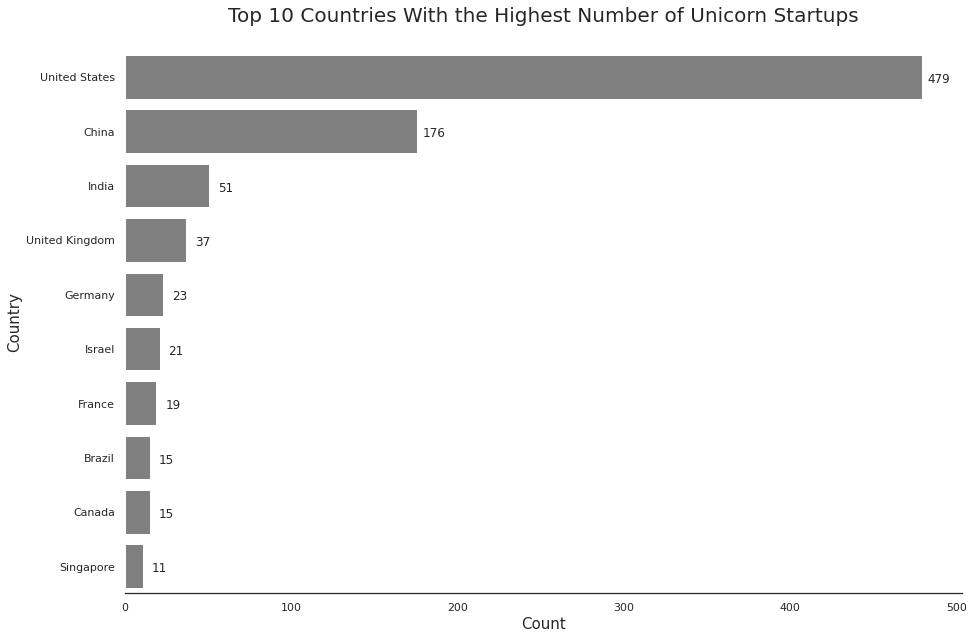

In [5]:
plt.rcParams["figure.figsize"] = (15,10)

sns.set(style="white")

plot = sns.countplot(y = 'Country',
              data= df,
              order = df.value_counts('Country').iloc[:10].index,
              orient = 'h',
              color = 'grey')

sns.despine(bottom = False, left = True)

plt.xlabel("Count", size=15)
plt.ylabel("Country", size=15)


plot.set_title('Top 10 Countries With the Highest Number of Unicorn Startups\n', size = 20);
for p in plot.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

### *Which city has the most unicorn startups in the United States?*

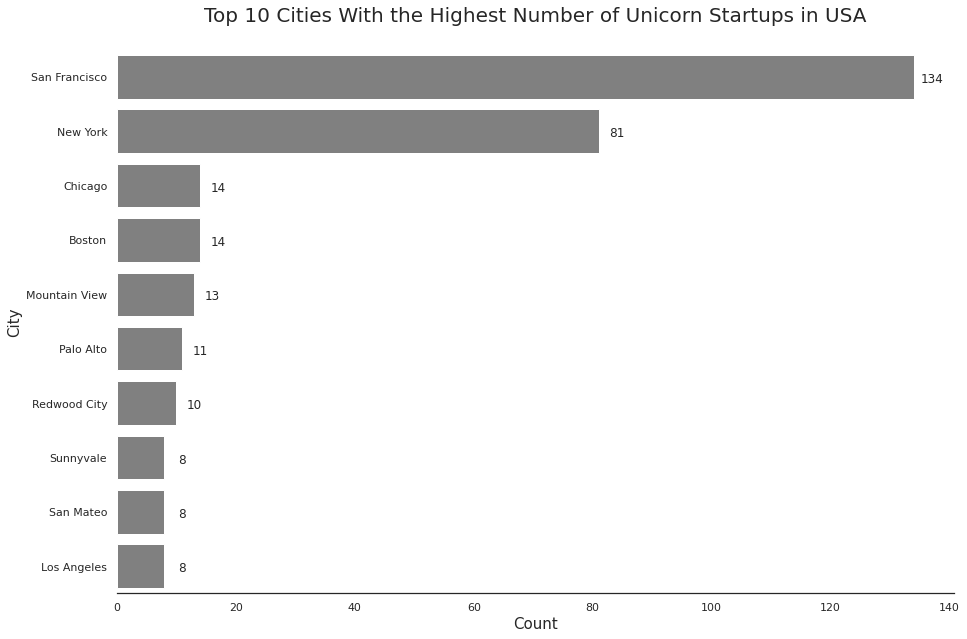

In [6]:
plot = sns.countplot(y = df['City'].loc[df['Country'] == 'United States'],
              order = df.loc[df['Country'] == 'United States'].value_counts('City').iloc[:10].index,
              orient = 'h',
              color = 'grey')

sns.despine(bottom = False, left = True)

plt.xlabel("Count", size=15)
plt.ylabel("City", size=15)
plot.set_title('Top 10 Cities With the Highest Number of Unicorn Startups in USA\n', size = 20);
for p in plot.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')

plt.show()

## *Unicorn startups valuation for each country*

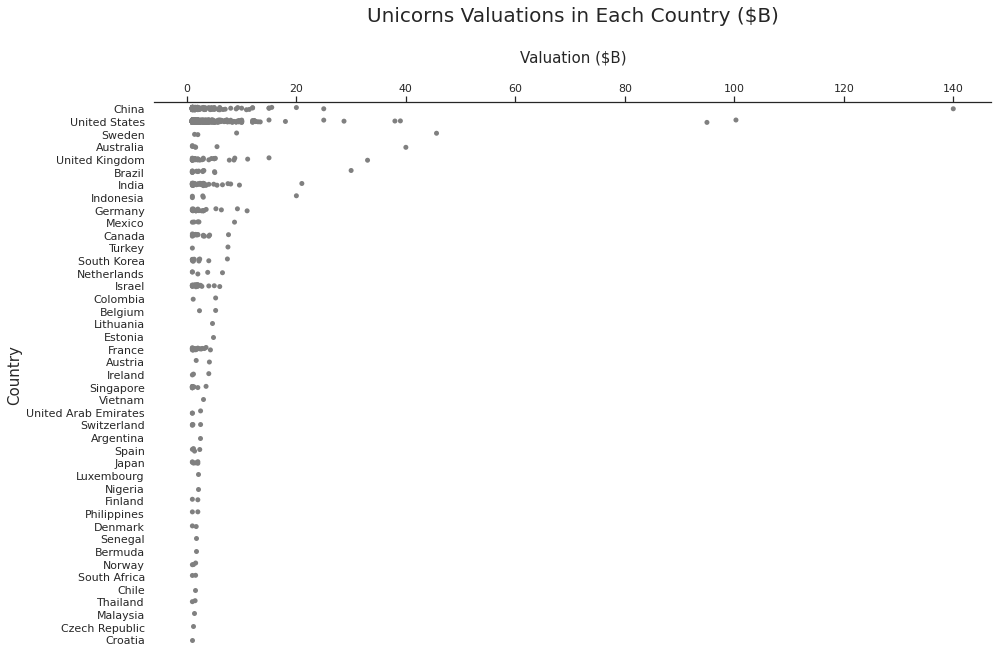

In [7]:
plt.figure(figsize=(15,10))
plot = sns.stripplot(y = 'Country',
                   x = 'Valuation ($B)',
                   data = df,
                   orient = 'h',
                   color = 'grey')

sns.despine(bottom = True, left = True, top = False)

plot.set_title('Unicorns Valuations in Each Country ($B)\n', size = 20);
plt.xlabel("Valuation ($B)\n", size=15)
plot.xaxis.set_ticks_position("top")
plot.xaxis.set_label_position('top')
plt.ylabel("Country", size=15)

plt.show()

## *Most valued companies*

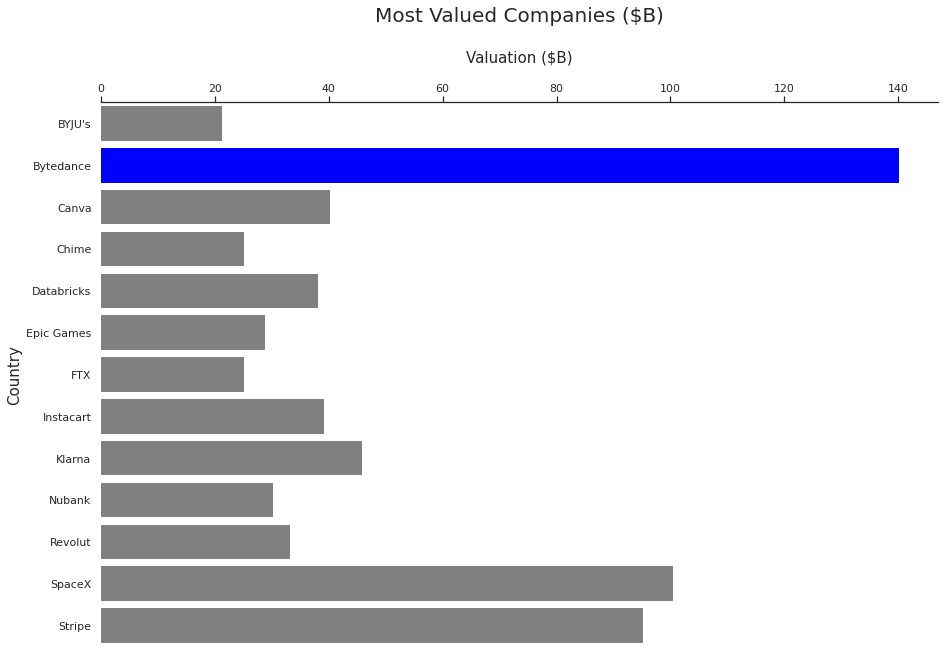

In [8]:
plot = sns.barplot(y = 'Company',
                   x = 'Valuation ($B)',
                   data = df,
                   orient = 'h',
                   color = 'grey',
                   order = df.loc[df['Valuation ($B)'] > 20].value_counts('Company').iloc[:].index)

sns.despine(bottom = True, left = True, top = False)

plot.set_title('Most Valued Companies ($B)\n', size = 20);
plt.xlabel("Valuation ($B)\n", size=15)
plot.xaxis.set_ticks_position("top")
plot.xaxis.set_label_position('top')
plt.ylabel("Country", size=15)

for bar in plot.patches:
    if bar.get_width() == 140:
        bar.set_color('blue')    
    else:
        bar.set_color('grey')

plt.show()

## *The valuation for each industry*

In [9]:
df_new = df.copy()
# Sum the valuation for each industry
df_new['industry_val'] = df_new.groupby('Industry')['Valuation ($B)'].transform('sum')

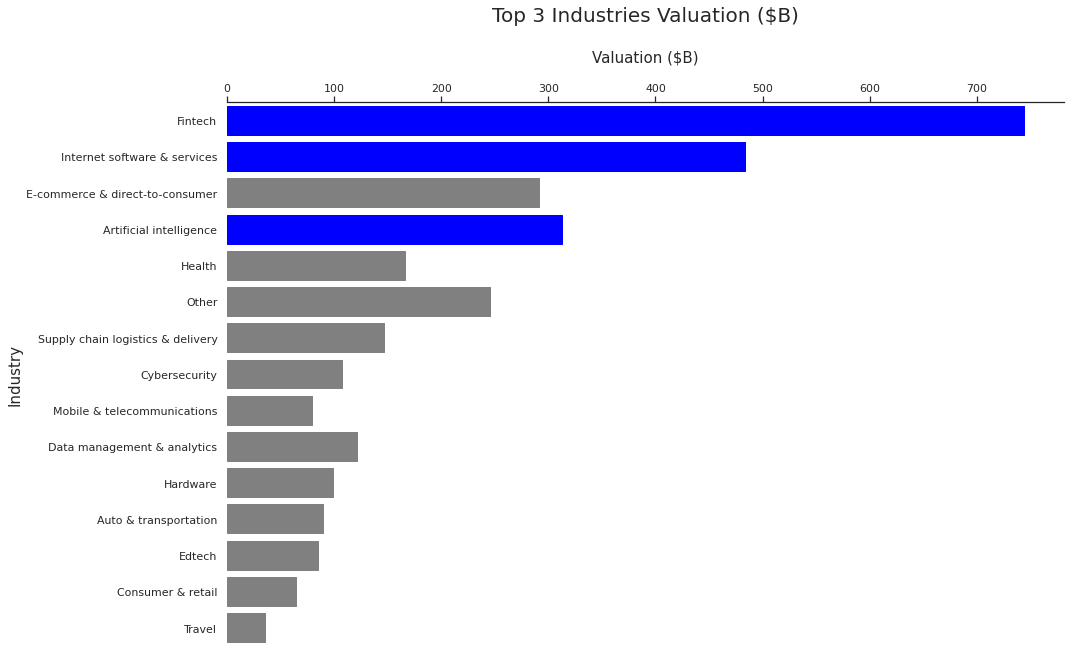

In [10]:
plot = sns.barplot(y = 'Industry',
                   x = 'industry_val',
                   data = df_new,
                   orient = 'h',
                   color = 'grey', 
                   order = df_new.value_counts('Industry').iloc[:].index)

sns.despine(bottom = True, left = True, top = False)

plot.set_title('Top 3 Industries Valuation ($B)\n', size = 20);
plt.xlabel("Valuation ($B)\n", size=15)
plot.xaxis.set_ticks_position("top")
plot.xaxis.set_label_position('top')
plt.ylabel("Industry", size=15)

lst = np.sort(list(df_new['industry_val'].value_counts().index))
lst = list(lst[-3:])

for bar in plot.patches:
    if round(bar.get_width(), 2) in lst:
        bar.set_color('blue')    
    else:
        bar.set_color('grey')

plt.show()

## *Age of the company and its valuation*

In [19]:
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_new['Age'] = df_new['Date Joined'].apply(age)

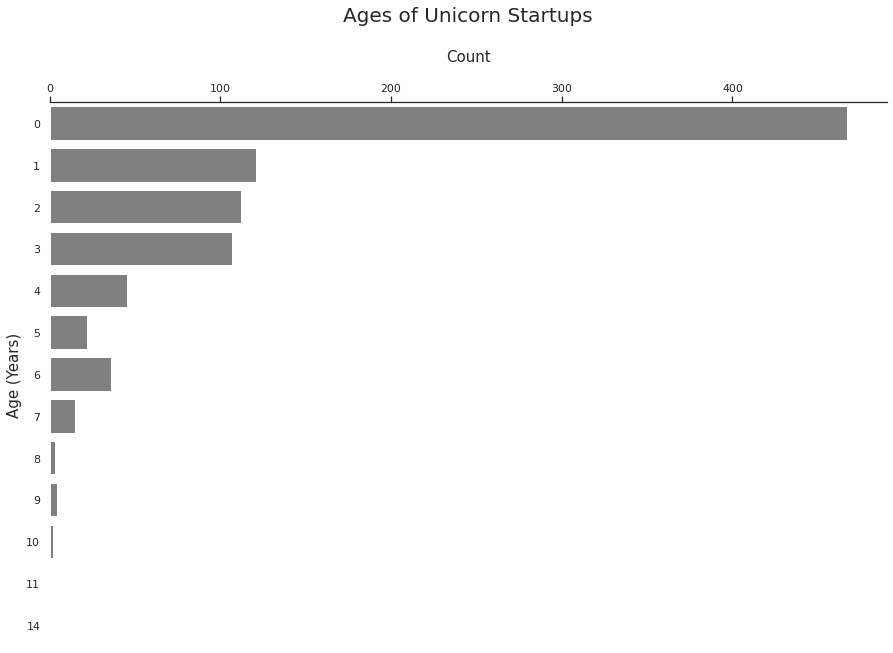

In [66]:
plot = sns.countplot(y = 'Age',
                   data = df_new,
                   orient = 'h',
                   color = 'grey')

sns.despine(bottom = True, left = True, top = False)

plot.set_title('Ages of Unicorn Startups\n', size = 20);
plt.xlabel("Count\n", size=15)
plot.xaxis.set_ticks_position("top")
plot.xaxis.set_label_position('top')
plt.ylabel("Age (Years)", size=15)

plt.show()

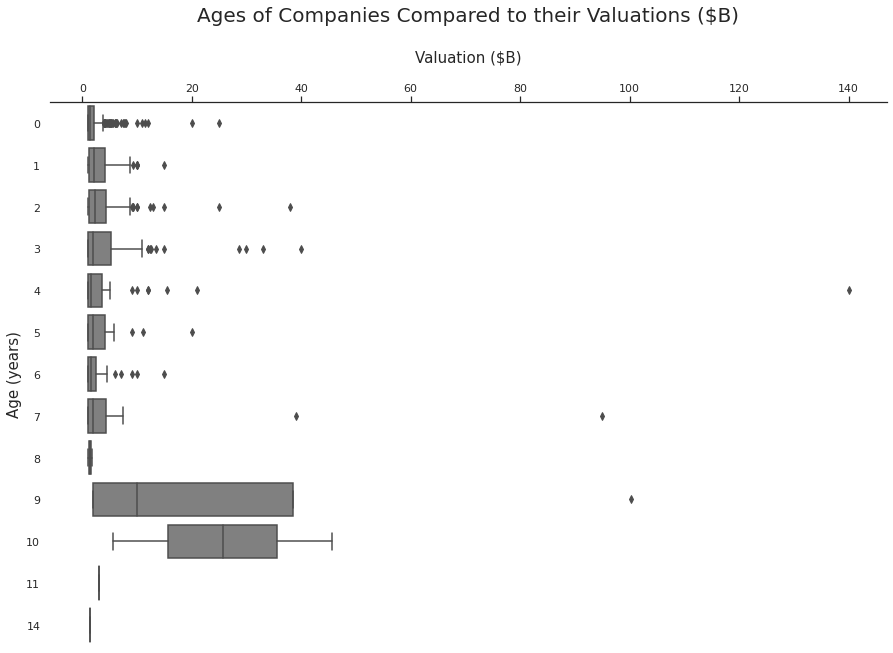

In [67]:
plot = sns.boxplot(x = 'Valuation ($B)',
                   y = 'Age',
                   data = df_new,
                   orient = 'h',
                   color = 'grey')

sns.despine(bottom = True, left = True, top = False)

plot.set_title('Ages of Companies Compared to their Valuations ($B)\n', size = 20);
plt.xlabel("Valuation ($B)\n", size=15)
plot.xaxis.set_ticks_position("top")
plot.xaxis.set_label_position('top')
plt.ylabel("Age (years)", size=15)

plt.show()

## *Ages of Unicorn Startups within Each Industry*

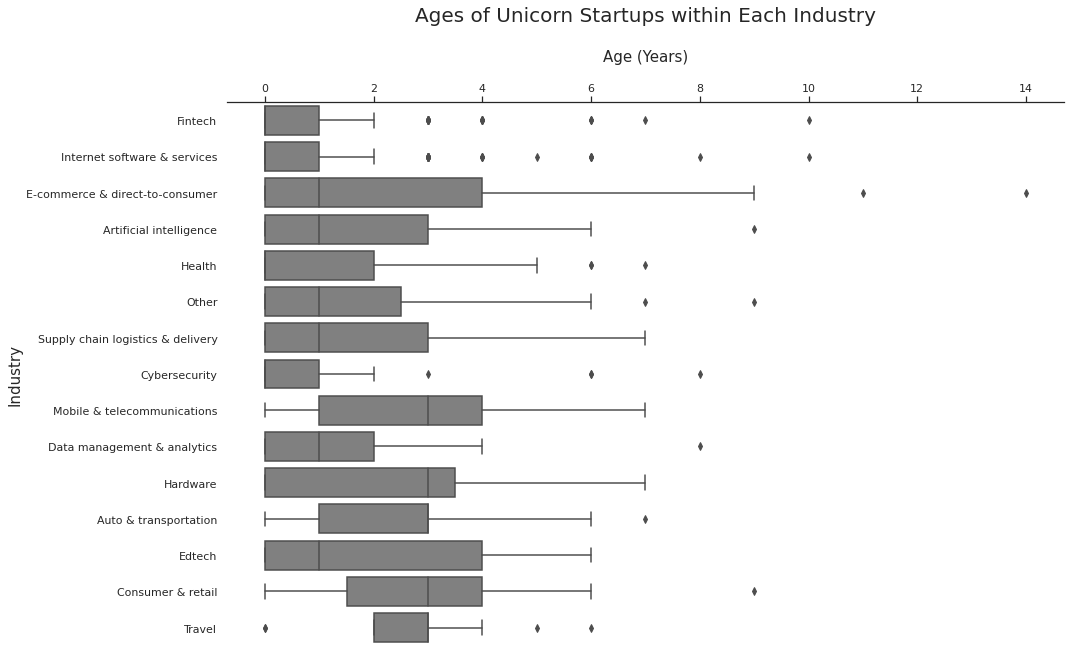

In [65]:
plot = sns.boxplot(y = 'Industry',
                   x = 'Age',
                   data = df_new,
                   orient = 'h',
                   color = 'grey', 
                   order = df_new.value_counts('Industry').iloc[:].index)

sns.despine(bottom = True, left = True, top = False)

plot.set_title('Ages of Unicorn Startups within Each Industry\n', size = 20);
plt.xlabel("Age (Years)\n", size=15)
plot.xaxis.set_ticks_position("top")
plot.xaxis.set_label_position('top')
plt.ylabel("Industry", size=15);